In [1]:
BLACK_CAT_FILE = "black.jpeg"
WHITE_CAT_FILE = "white.jpeg"
CALENDAR_FILE = "calendar.jpeg"
PERTANDINGAN_FILE = "pertandingan.jpeg"
BOLA_FILE = "bola.jpg"

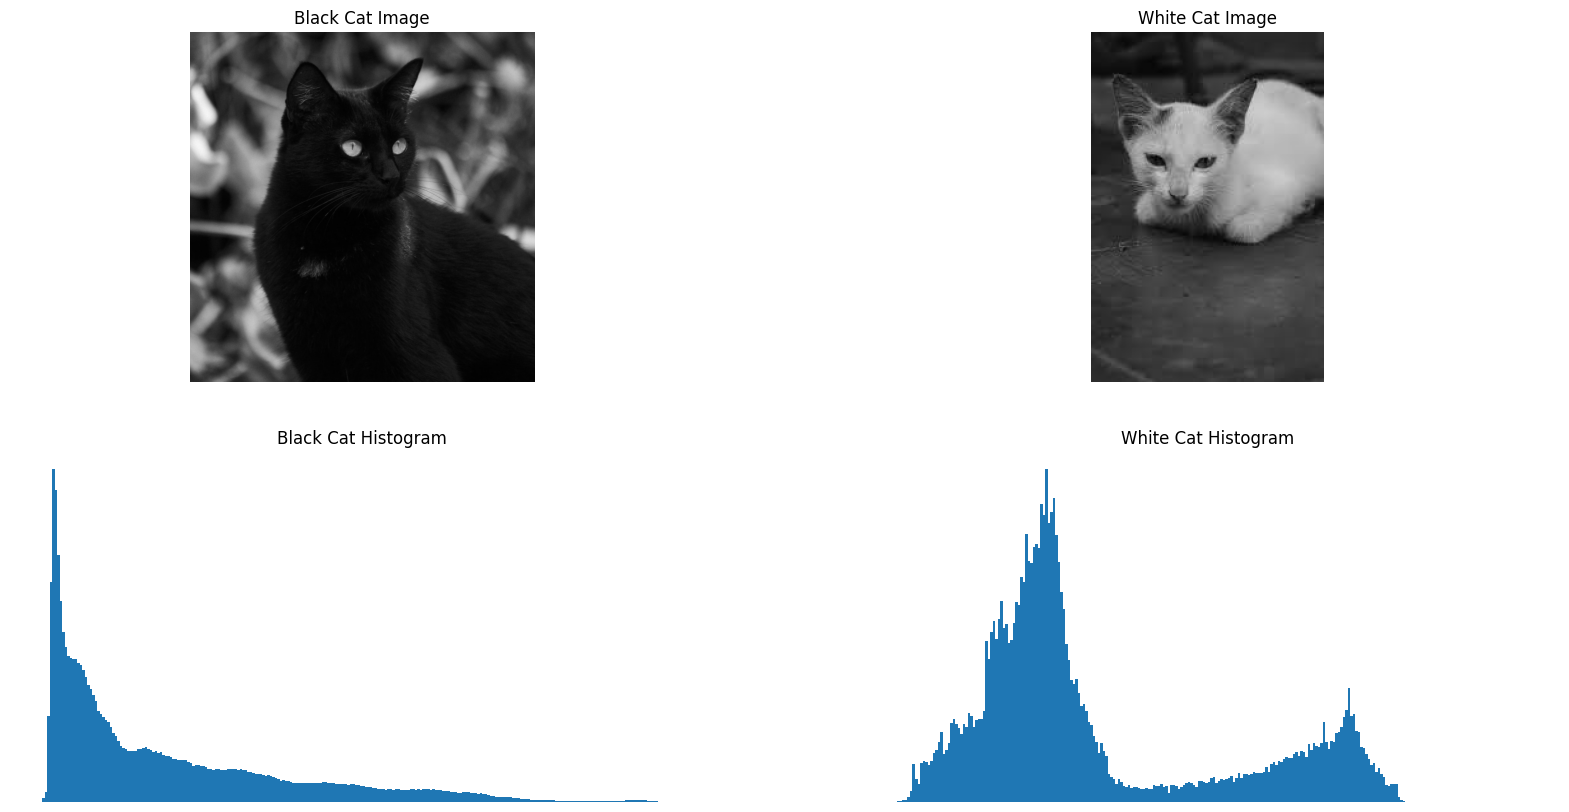

In [2]:
from skimage import io
import matplotlib.pyplot as plt

black = io.imread(BLACK_CAT_FILE)
white = io.imread(WHITE_CAT_FILE)

# Show image
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.title('Black Cat Image')
plt.imshow(black)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title('White Cat Image')
plt.imshow(white)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.title('Black Cat Histogram')
plt.hist(black.flatten(), 256, range=(0,255))
plt.axis('off')
plt.subplot(2, 2, 4)
plt.title('White Cat Histogram')
plt.hist(white.flatten(), 256, range=(0,255))
plt.axis('off')
plt.show()

In [3]:
import numpy as np

def predict(file_name):
    img = io.imread(file_name)
    frequency_count = np.bincount(img.flatten())
    cum_sum = np.cumsum(frequency_count)


  # lebih banyak intensitas rendah, prediksi sebagai kucing hitam
    if cum_sum[50] > (cum_sum[-1] - cum_sum[50]):
        return 'black'
    else:
        return 'white'

print(f'image {BLACK_CAT_FILE} predicted as {predict(BLACK_CAT_FILE)} cat')
print(f'image {WHITE_CAT_FILE} predicted as {predict(WHITE_CAT_FILE)} cat')

image black.jpeg predicted as black cat
image white.jpeg predicted as white cat


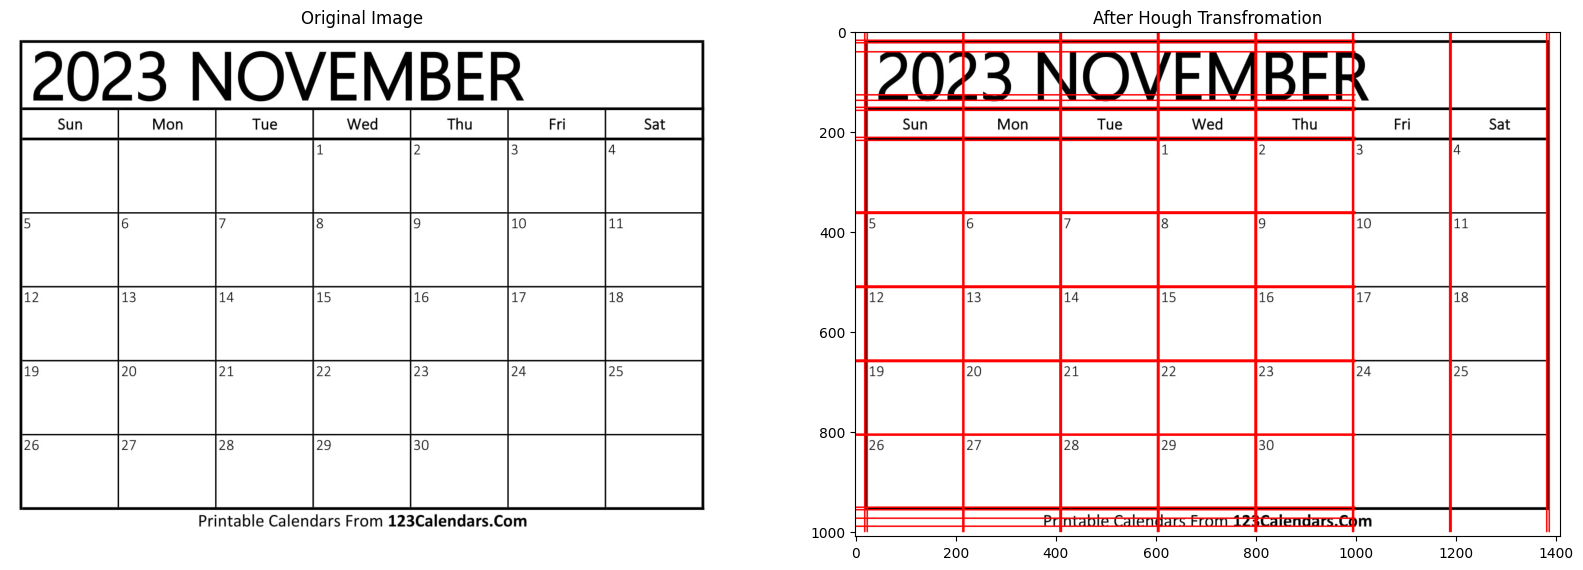

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import io, color

img = io.imread(CALENDAR_FILE)
original_image = np.copy(img)

# convert image to gray
gray = (color.rgb2gray(img) * 255).astype(np.uint8)

# find all of the edges using canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
# find all of the lines using hough transformation
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# plotting line
for line in lines:
   for rho,theta in line:
       a = np.cos(theta)
       b = np.sin(theta)
       x0 = a*rho
       y0 = b*rho
       x1 = int(x0 + 1000*(-b))
       y1 = int(y0 + 1000*(a))
       x2 = int(x0 - 1000*(-b))
       y2 = int(y0 - 1000*(a))
       cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 2)

# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('After Hough Transfromation')
plt.imshow(img,)


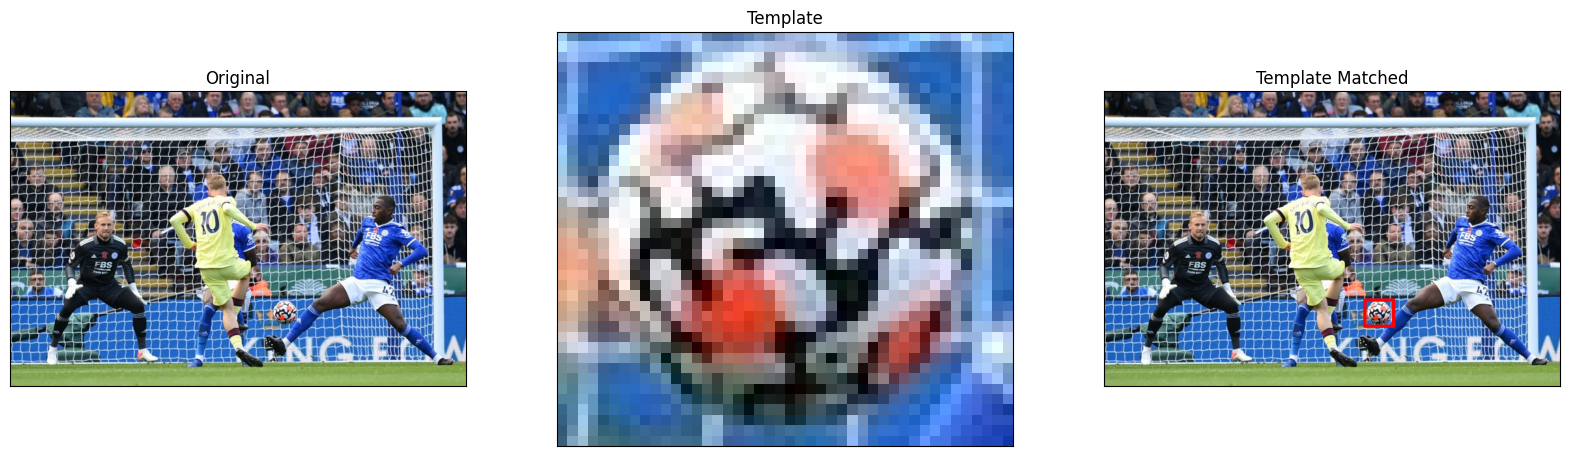

In [5]:
from skimage import io, util, color
from cv2 import matchTemplate, TM_CCOEFF_NORMED, rectangle
import numpy as np
import matplotlib.pyplot as plt

# Read image
image = util.img_as_ubyte(io.imread(PERTANDINGAN_FILE))
template = util.img_as_ubyte(io.imread(BOLA_FILE))

# To gray
image_gray = util.img_as_ubyte(color.rgb2gray(image))
template_gray = util.img_as_ubyte(color.rgb2gray(template))

# Get height and width of template
h, w = template_gray.shape

# Match template using cv2.matchTemplate
result = matchTemplate(image_gray, template_gray, TM_CCOEFF_NORMED)

# Copy image for bounding box
matched = image.copy()

# Thresholding
threshold = 0.5
loc = np.where(result >= threshold)

# Create bounding box
for point in zip(*loc[::-1]):
    rectangle(matched, point, (point[0] + w, point[1] + h), (255,0,0), 2)

# Show image
plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(image)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(template)
plt.title('Template'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(matched)
plt.title('Template Matched'), plt.xticks([]), plt.yticks([])
plt.yticks([])
plt.show()